In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
from sklearn import *


/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/sklearn/qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


In [89]:
np.random.seed(50)
# generating random numbers
X = np.random.normal(loc = 1, scale = 5 , size =100) 
y = np.random.normal(loc = 1, scale = 5 , size =100)
y = X - 2*X**2+np.random.normal(100)

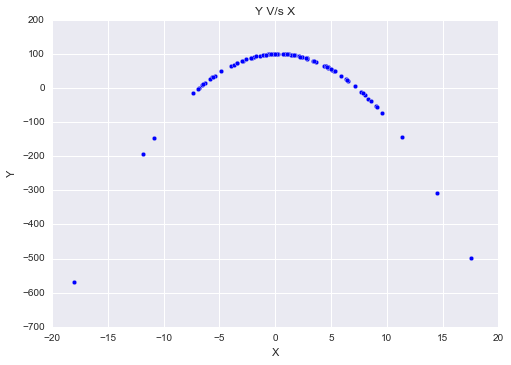

In [90]:
plt.scatter(x = X , y = y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Y V/s X')

In [91]:
df = pd.DataFrame({'X':X , 'Y':y})

In [92]:
df.head()

,X,Y
0,-6.801761,1.235368
1,0.845112,99.981705
2,-2.104642,89.601343
3,-6.322902,14.283929
4,8.059731,-21.293763


In [93]:
# Adding polynomial features
df['X_2'] = df.X**2
df['X_3'] = df.X**3
df['X_4'] = df.X**4

In [29]:
df.head()

,X,Y,X_2,X_3,X_4
0,9.121727,-57.690952,83.205900,758.981491,6923.221819
1,-2.058782,89.063173,4.238584,-8.726320,17.965591
2,-1.640859,92.573428,2.692417,-4.417877,7.249112
3,-4.364843,57.130568,19.051855,-83.158360,362.973193
4,5.327038,48.171489,28.377335,151.167148,805.273165


In [33]:
df.iloc[[2]]

,X,Y,X_2,X_3,X_4
2,-1.640859,92.573428,2.692417,-4.417877,7.249112


In [94]:
y = df.Y
X_linear = df[['X']]
X_quad = df[['X','X_2']]
X_cube = df[['X','X_2','X_3']]
X_quar = df[['X','X_2','X_3','X_4']]

#### We would now create 4 separate models -Linear, quadratic,cubic,quartic and try to estimate the MSE on each of the model using the LOOCV approach

In [95]:

# these 4 vars will hold the values of the test MSEs
mse_linear = 0
mse_quad = 0
mse_cube = 0
mse_quar = 0
yhat_linear = []
yhat_quad = []
yhat_cube = []
yhat_quar = []

# The loop below splits the data in test and training and estimates the test MSE
for i in range(0,len(df)):
    # Creating test sets from the data sets
    test_X_linear = X_linear.iloc[[i]]
    test_X_quad = X_quad.iloc[[i]]
    test_X_cube = X_cube.iloc[[i]]
    test_X_quar = X_quar.iloc[[i]]
    # Test y - the actual lable would be the same for all the models
    test_y = y[i]
    
    # creating the training sets for the model
    
    train_X_linear = X_linear.drop(X_linear.index[[i]])
    train_X_quad = X_quad.drop(X_quad.index[[i]])
    train_X_cube = X_cube.drop(X_cube.index[[i]])
    train_X_quar = X_quar.drop(X_quar.index[[i]])
    # train y would be the same for all the X's
    train_y = y.drop(y.index[i])
    
    #creating models
    model_linear = linear_model.LinearRegression().fit(train_X_linear ,train_y)
    model_quad = linear_model.LinearRegression().fit(train_X_quad ,train_y)
    model_cube = linear_model.LinearRegression().fit(train_X_cube ,train_y)
    model_quar = linear_model.LinearRegression().fit(train_X_quar ,train_y)
    
    # Predicting values and calculating MSEs
    y_hat_linear = model_linear.predict(test_X_linear)
    yhat_linear.append(y_hat_linear)
    mse_linear = mse_linear + (y_hat_linear - test_y)**2
    
    y_hat_quad = model_quad.predict(test_X_quad)
    mse_quad = mse_quad + (y_hat_quad - test_y)**2
    yhat_quad.append(y_hat_quad)
    
    y_hat_cube = model_cube.predict(test_X_cube)
    mse_cube = mse_cube + (y_hat_cube - test_y)**2
    yhat_cube.append(y_hat_cube)
    
    y_hat_quar = model_quar.predict(test_X_quar)
    mse_quar = mse_quar + (y_hat_quar - test_y)**2
    yhat_quar.append(y_hat_quar)

mse_linear = (mse_linear)/len(df)
mse_quad = (mse_quad)/len(df)
mse_cube = (mse_cube)/len(df)
mse_quar = (mse_quar)/len(df)

In [96]:
print " The test MSE for linear model is %r" %mse_linear
print " The test MSE for Quadratic model is %r" %mse_quad
print " The test MSE for cubic model is %r" %mse_cube
print " The test Quartic   model is %r" %mse_quar

 The test MSE for linear model is array([ 13728.29853699])
 The test MSE for Quadratic model is array([  1.82106962e-27])
 The test MSE for cubic model is array([  1.19780135e-25])
 The test Quartic   model is array([  1.01392002e-23])


([<matplotlib.axis.XTick at 0x1203eae90>,
 <a list of 4 Text xticklabel objects>)

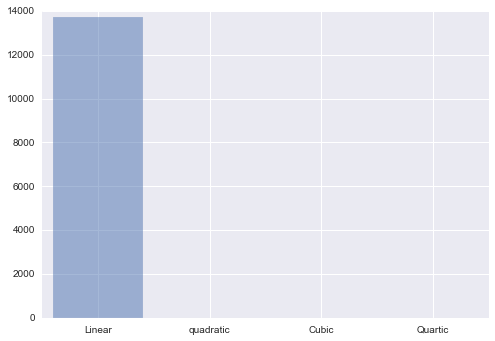

In [97]:
fig, ax = plt.subplots()
y_pos = range(0,4) # for each of the Model score
objects = ('Linear', 'quadratic', 'Cubic', 'Quartic')
performance = [mse_linear , mse_quad , mse_cube , mse_quar]
index = [1 ,2 , 3 ,4]
bar_width = .35

plt.bar(y_pos, performance, align='center', alpha=0.5)
#plt.bar(performance,y_pos ,align='center', alpha=0.5)
plt.xticks(y_pos, objects)


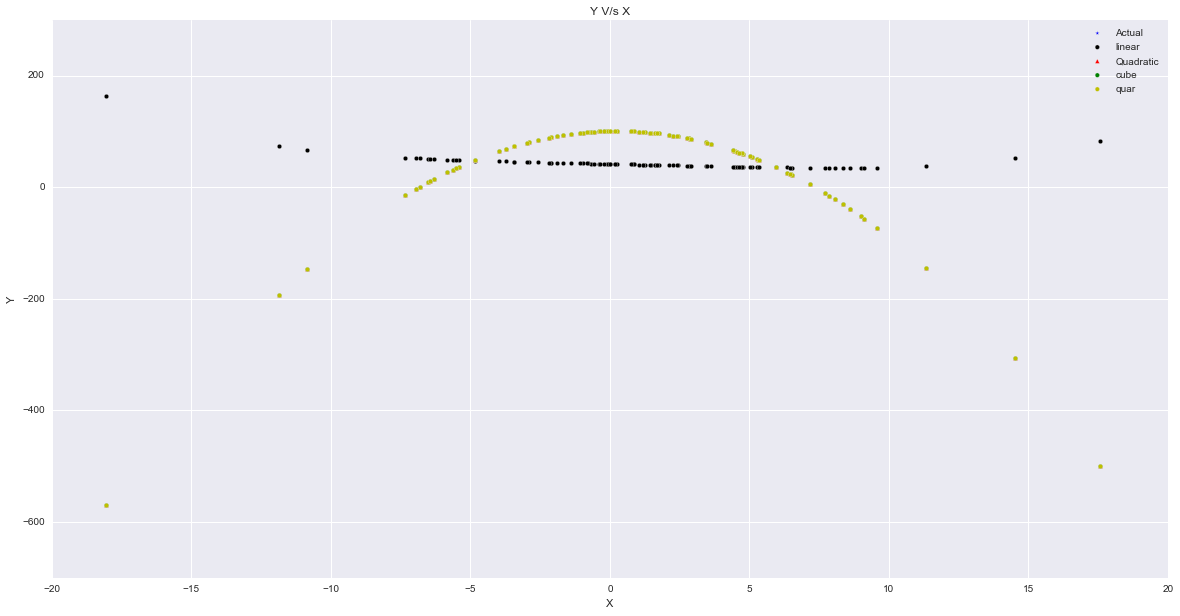

In [98]:
plt.figure(figsize=(20,10))
plt.scatter(x = df.X , y = df.Y ,marker = '*' ,label = 'Actual')
plt.scatter(x = df.X , y = yhat_linear ,marker = 'o' ,label = 'linear',c = 'k')
plt.scatter(x = df.X , y = yhat_quad ,marker = '^' ,label = 'Quadratic',c = 'r')
plt.scatter(x = df.X , y = yhat_cube ,label = 'cube',c = 'g')
plt.scatter(x = df.X , y = yhat_quar ,label = 'quar',c = 'y')
plt.legend(loc='best')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Y V/s X')

Conclusion:
- The MSE for Quadratic , Cubic and Bi quadratic models are very close to one another and are hence overlapping